# PROJETO 2_CIÊNCIA DOS DADOS #

*** 

NOME : Giancarlo Vanoni Ruggiero 

NOME : Maria Eduarda Gonçalves Torres

NOME : Rodrigo Vilela

*** 

In [37]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import numpy
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
data = 'heart.xlsx'
dados = pd.read_excel( data)
dados.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Legenda do dataset

* **idade -** idade em anos

* **sexo -** sexo ( 1 = masculino; 0 = feminino )

* **cp -** tipo de dor torácica ( 1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 0 = assintomática )

* **trtbps -** pressão arterial em repouso ( em mm Hg na admissão ao hospital )

* **col -**  colesterol sérico em mg / dl

* **fbs -**  açúcar no sangue em jejum> 120 mg / dl ( 1 = verdadeiro; 0 = falso )

* **restecg -**  resultados eletrocardiográficos em repouso ( 1 = normal; 2 = tendo anormalidade da onda ST-T; 0 = hipertrofia )

* **thalach -**  frequência cardíaca máxima alcançada

* **exang -**  angina induzida por exercício ( 1 = sim; 0 = não )

* **oldpeak -**  depressão de ST induzida por exercícios em relação ao repouso

* **slope -**  a inclinação do segmento ST de pico do exercício ( 2 = inclinação para cima; 1 = plana; 0 = inclinação para baixo )

* **caa -**  número de vasos principais ( 0-3 ) coloridos por fluorosopia

* **thal -**  2 = normal; 1 = defeito corrigido; 3 = defeito reversível

* **output ( target ) -**  o atributo previsto - chance de doença cardíaca ( Valor 0 = menor chance; Valor 1 => maior chance)

### O que vamos analisar?

O objetivo do projeto é explicar / prever se as chances de um paciente ter ataque cardíaco é alta ou baixa, em função de indicadores de doenças cardíacas, que são:

- **Qualitativas**

   - sexo
   - cp
   - fbs
   - restecg
   - exng
   - slope
   - thal


- **Quantitativas**

    - idade 
    - trstbps
    - col
    - thalach
    - oldpeak
    - caa


Os recursos são calculados a partir de análises estatísticas que consistiram na distribuição das variáveis antropométricas segundo os fatores de risco cardiovascular por medidas de frequência e dispersão. Por conta disso, vamos considerar a coluna output como variável dependente ( variável target ) para ser considerada no eixo y. E o resto das colunas como variávies independentes ( variáveis features ) no eixo x.

---

Com o comando `df.isnull().sum() ` certificamos que todas as colunas estão com dados preenchidos. Portanto podemos prosseguir com a análise.

In [3]:
dados.isnull().sum()  

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

O `sns.heatmap()` abaixo vai representa a colinearidade de todas variáveis no conjunto de dados.

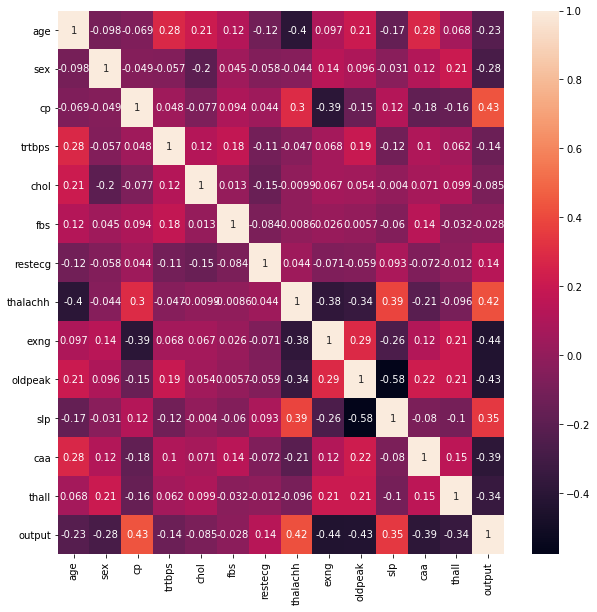

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(dados.corr(), annot=True); #annot mostra os coeficientes da matriz
plt.show();

Cada quadrado mostra a correlação entre as variáveis em cada eixo. A correlação varia de -1 a +1. Valores mais próximos de zero significam que não há tendência linear entre as duas variáveis. 

Quanto mais próxima de 1 a correlação é, mais positivamente correlacionados eles são; isto é, à medida que um aumenta, o outro aumenta e quanto mais próximo de 1, mais forte é a relação, de modo que podemos perceber a alta e positiva associação entre a target `output` e as features `slp`,`thalachh` e `cp`. 


Uma correlação mais próxima de -1 é semelhante, mas em vez de aumentar, uma variável diminuirá à medida que a outra aumenta. Portanto conforme explorado, observamos uma forte e negativa dependencia entre a target `output` e as features `exng  `,`oldpeak ` e ` caa `. 

## Análise exploratória 


A seguir vamos fazer uma analise descritiva das variáveis, conforme o objetivo do projeto. Vamos procurar entender como a variável target ( output ) se comporta cruzada com cada feature. Contudo cada cruzamento irá exigir ferramentas descritivas distintas.


### Análise descritiva  de variáveis <u> quantitativa VS qualitativas( target )</u>

In [5]:
maior_chance=dados.loc[dados['output']==1,:]
menor_chance=dados.loc[dados['output']==0,:]

#### Idade

In [6]:
dados['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

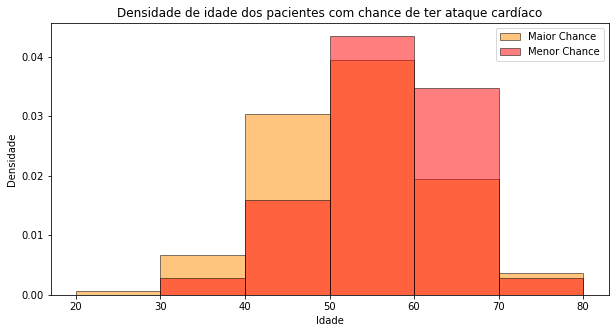

In [7]:
idade_maior=maior_chance['age']
idade_menor=menor_chance['age']

plt.figure(figsize=(10, 5))

faixa_idade = np.arange(20,90,10)

plt.subplot(111)
plt.hist(idade_maior, bins=faixa_idade, edgecolor='black', color='darkorange', density=True,alpha=0.5, label='Maior Chance')
plt.hist(idade_menor, bins=faixa_idade, edgecolor='black', color='red', density=True,alpha=0.5, label='Menor Chance')
plt.legend()
plt.title('Densidade de idade dos pacientes com chance de ter ataque cardíaco')
plt.ylabel('Densidade')
plt.xlabel('Idade')


plt.show()

In [8]:
dados.groupby('output').age.describe()  

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,56.601449,7.962082,35.0,52.0,58.0,62.0,77.0
1,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

Como é possivel analisar no gráfico, a idade do paciente não possui uma forte correlação com um risco maior ou menor de ter ataque cardíaco

-----------------

#### Pressão arterial

In [9]:
dados['trtbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

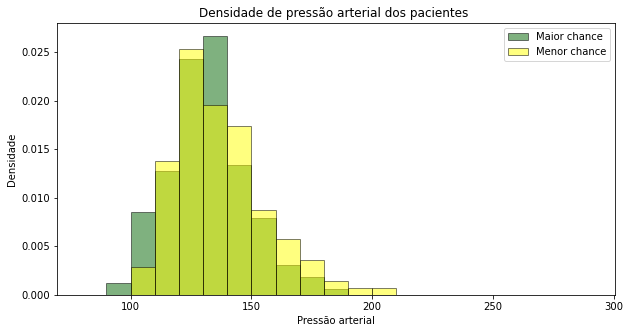

In [10]:
pressao_maior=maior_chance['trtbps']
pressao_menor=menor_chance['trtbps']

plt.figure(figsize=(10, 5))

faixa_pressao = np.arange(80,300,10)

plt.subplot(111)
plt.hist(pressao_maior, bins=faixa_pressao, edgecolor='black', color='darkgreen', density=True,alpha=0.5, label='Maior chance')
plt.hist(pressao_menor, bins=faixa_pressao, edgecolor='black', color='yellow', density=True,alpha=0.5, label='Menor chance')
plt.title('Densidade de pressão arterial dos pacientes ')
plt.ylabel('Densidade')
plt.xlabel('Pressão arterial')
plt.legend()

plt.show()

In [11]:
dados.groupby('output').trtbps.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,134.398551,18.729944,100.0,120.0,130.0,144.75,200.0
1,165.0,129.303030,16.169613,94.0,120.0,130.0,140.00,180.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

O gráfico não sugere uma correlação forte entre colesterol e a variável target

-----------------

#### Colesterol

In [12]:
dados['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

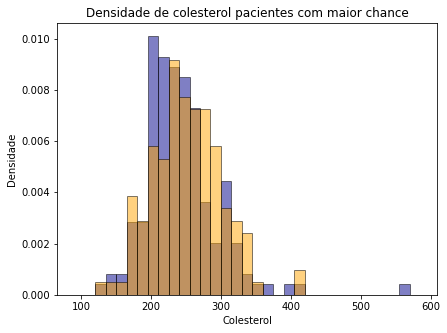

In [13]:
col_maior=maior_chance['chol']
col_menor=menor_chance['chol']

plt.figure(figsize=(15, 5))

faixa_colesterol = np.arange(90,600,15)

plt.subplot(121)
plt.hist(col_maior, bins=faixa_colesterol, edgecolor='black', color='darkblue', density=True,alpha=0.5)
plt.hist(col_menor, bins=faixa_colesterol, edgecolor='black', color='orange', density=True,alpha=0.5)
plt.title('Densidade de colesterol pacientes com maior chance')
plt.ylabel('Densidade')
plt.xlabel('Colesterol')

plt.show()

In [14]:
dados.groupby('output').chol.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,251.086957,49.454614,131.0,217.25,249.0,283.0,409.0
1,165.0,242.230303,53.552872,126.0,208.00,234.0,267.0,564.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

A partir do gráfico não é possível encontrar uma correlação

-----------------

#### Frequência cardíaca máxima alcançada

In [15]:
dados['thalachh'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

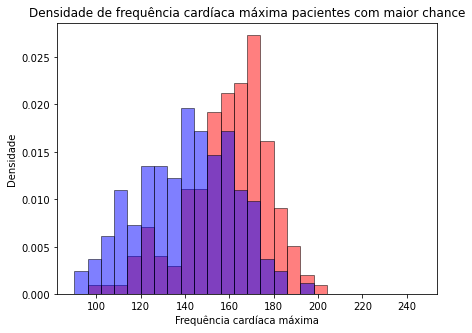

In [16]:
freq_maior=maior_chance['thalachh']
freq_menor=menor_chance['thalachh']

plt.figure(figsize=(15, 5))

faixa_freq_card = np.arange(90,250,6)

plt.subplot(121)
plt.hist(freq_maior, bins=faixa_freq_card, edgecolor='black', color='red', density=True,alpha=0.5)
plt.hist(freq_menor, bins=faixa_freq_card ,edgecolor='black', color='blue', density=True,alpha=0.5)
plt.title('Densidade de frequência cardíaca máxima pacientes com maior chance')
plt.ylabel('Densidade')
plt.xlabel('Frequência cardíaca máxima')

plt.show()

In [17]:
dados.groupby('output').thalachh.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,139.101449,22.598782,71.0,125.0,142.0,156.0,195.0
1,165.0,158.466667,19.174276,96.0,149.0,161.0,172.0,202.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

O gráfico sugere que quanto maior a frequência cardíaca máxima é mais provável que a pessoa venha a ter um ataque cardíaco

--------

#### Número de vasos principais

In [18]:
dados['caa'].describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: caa, dtype: float64

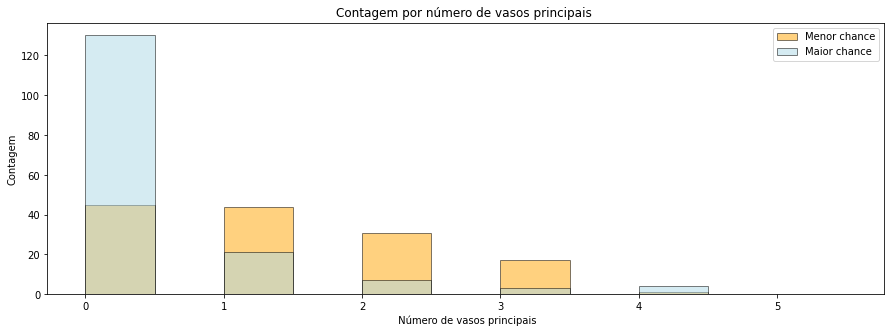

In [19]:
vaso_maior=maior_chance['caa']
vaso_menor=menor_chance['caa']

plt.figure(figsize=(15, 5))

faixa_vasos = np.arange(0,6,0.5)

plt.subplot(111)
plt.hist(vaso_menor, bins=faixa_vasos, edgecolor='black', color='orange', density=False,alpha=0.5, label='Menor chance')
plt.hist(vaso_maior, bins=faixa_vasos, edgecolor='black', color='lightblue', density=False,alpha=0.5, label='Maior chance')
plt.title('Contagem por número de vasos principais ')
plt.ylabel('Contagem')
plt.xlabel(' Número de vasos principais')
plt.legend()

plt.show()

In [20]:
dados.groupby('output').caa.describe()

,count,mean,std,min,25%,50%,75%,max
output,,,,,,,,
0,138.0,1.166667,1.043460,0.0,0.0,1.0,2.0,4.0
1,165.0,0.363636,0.848894,0.0,0.0,0.0,0.0,4.0


<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

O gráfico sugere que quando o número de vasos é 0 a chance de ter um ataque cardíaco é maior

-----------

#### Old Peak

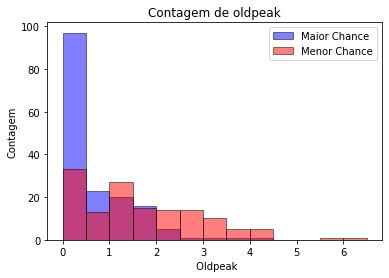

In [21]:
oldpeak_maior=maior_chance['oldpeak']
oldpeak_menor=menor_chance['oldpeak']

faixa_oldpeak = np.arange(0,7,0.5)

plt.subplot(111)
plt.hist(oldpeak_maior, bins=faixa_oldpeak, edgecolor='black', color='blue', density=False,alpha=0.5, label='Maior Chance')
plt.hist(oldpeak_menor, bins=faixa_oldpeak, edgecolor='black', color='red', density=False,alpha=0.5, label='Menor Chance')
plt.title('Contagem de oldpeak')
plt.ylabel('Contagem')
plt.xlabel(' Oldpeak')
plt.legend()

plt.show()

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

O gráfico sugere que um oldpeak mais baixo acarreta em uma maior chance de ter ataque cardíaco

--------------

### Análise descritiva  de variáveis <u> qualitativas VS qualitativa ( target )</u>

#### Sexo

* sexo (1 = masculino; 0 = feminino)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [22]:
pd.crosstab(dados['output'], dados['sex'],normalize=True,margins=True)

sex,0,1,All
output,,,
0,0.079208,0.376238,0.455446
1,0.237624,0.306931,0.544554
All,0.316832,0.683168,1.000000


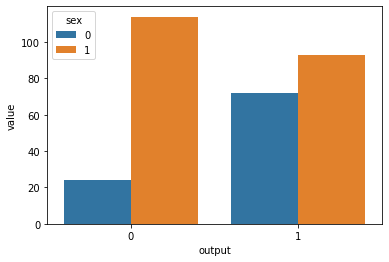

In [23]:
ct = pd.crosstab(dados['output'], dados['sex'])

# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked.output, y=stacked.value, hue=stacked.sex);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

----

#### Tipo de dor torácica

* cp (1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 0 = assintomática)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [24]:
pd.crosstab(dados['output'], dados['cp'],normalize=True,margins=True)

cp,0,1,2,3,All
output,,,,,
0,0.343234,0.029703,0.059406,0.023102,0.455446
1,0.128713,0.135314,0.227723,0.052805,0.544554
All,0.471947,0.165017,0.287129,0.075908,1.000000


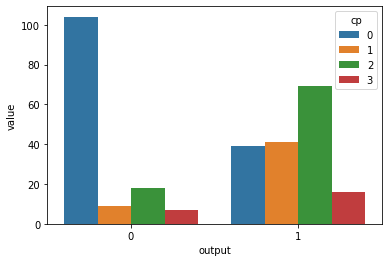

In [25]:
ct_cp = pd.crosstab(dados['output'], dados['cp'])

# now stack and reset
stacked_cp = ct_cp .stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_cp.output, y=stacked_cp.value, hue=stacked_cp.cp);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

----

#### Açúcar no sangue em jejum

* fbs (1 = verdadeiro; 0 = falso)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [26]:
pd.crosstab(dados['output'], dados['fbs'],normalize=True,margins=True)

fbs,0,1,All
output,,,
0,0.382838,0.072607,0.455446
1,0.468647,0.075908,0.544554
All,0.851485,0.148515,1.000000


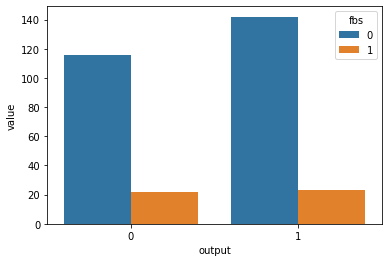

In [27]:
ct_fbs = pd.crosstab(dados['output'], dados['fbs'])

# now stack and reset
stacked_fbs = ct_fbs.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_fbs.output, y=stacked_fbs.value, hue=stacked_fbs.fbs);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

----

#### Resultados eletrocardiográficos em repouso

* restecg (1 = normal; 2 = tendo anormalidade da onda ST-T; 0 = hipertrofia)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [28]:
pd.crosstab(dados['output'], dados['restecg'],normalize=True,margins=True)

restecg,0,1,2,All
output,,,,
0,0.260726,0.184818,0.009901,0.455446
1,0.224422,0.316832,0.003300,0.544554
All,0.485149,0.501650,0.013201,1.000000


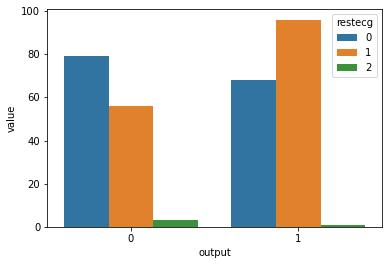

In [29]:
ct_restecg = pd.crosstab(dados['output'], dados['restecg'])

# now stack and reset
stacked_restecg = ct_restecg.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_restecg.output, y=stacked_restecg.value, hue=stacked_restecg.restecg);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

----

#### Angina induzida por exercício 

* exng  (1 = sim; 0 = não)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [30]:
pd.crosstab(dados['output'], dados['exng'],normalize=True,margins=True)

exng,0,1,All
output,,,
0,0.204620,0.250825,0.455446
1,0.468647,0.075908,0.544554
All,0.673267,0.326733,1.000000


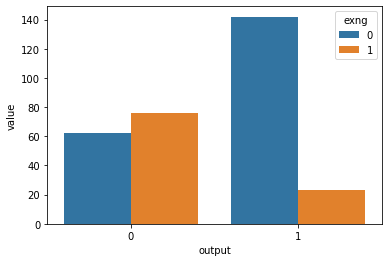

In [31]:
ct_exng = pd.crosstab(dados['output'], dados['exng'])

# now stack and reset
stacked_exng = ct_exng.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_exng.output, y=stacked_exng.value, hue=stacked_exng.exng);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

----

#### Inclinação do segmento ST de pico do exercício

* slope (2 = inclinação para cima; 1 = plana; 0 = inclinação para baixo)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [32]:
pd.crosstab(dados['output'], dados['slp'],normalize=True,margins=True)

slp,0,1,2,All
output,,,,
0,0.039604,0.300330,0.115512,0.455446
1,0.029703,0.161716,0.353135,0.544554
All,0.069307,0.462046,0.468647,1.000000


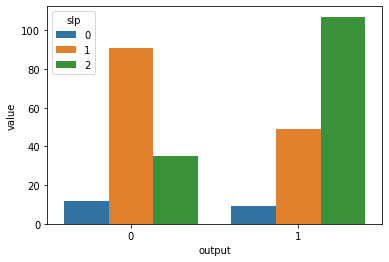

In [33]:
ct_slp = pd.crosstab(dados['output'], dados['slp'])

# now stack and reset
stacked_slp = ct_slp.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_slp.output, y=stacked_slp.value, hue=stacked_slp.slp);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

----

#### Talassemia

* thal(- 2 = normal; 1 = defeito corrigido; 3 = defeito reversível)
* output (0 = menor chance de ter um ataque cardiaco; 1 = maior chance de ter um ataque cardiaco)

In [34]:
pd.crosstab(dados['output'], dados['thall'],normalize=True,margins=True)

thall,0,1,2,3,All
output,,,,,
0,0.003300,0.039604,0.118812,0.293729,0.455446
1,0.003300,0.019802,0.429043,0.092409,0.544554
All,0.006601,0.059406,0.547855,0.386139,1.000000


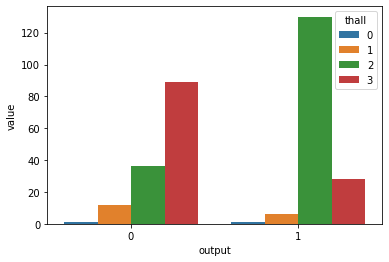

In [35]:
ct_thall = pd.crosstab(dados['output'], dados['thall'])

# now stack and reset
stacked_thall = ct_thall.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked_thall.output, y=stacked_thall.value, hue=stacked_thall.thall);

<kbd><code style="background:white;color:black;font:arial">Interpretação</code></kbd>

------

## Modelos de Predição

Depois de analisar e entender melhor como as features se relacinam com a target, procederemos às possíveis técnicas que podem ser aplicadas em nossa base de dado para obtermos um bom modelo de predição. 

A seguir vamos separar a sua base de dados em base de treino e base de teste, posto que é um ponto fundamental para podermos validar o modelo escolhido.  A base de treino é aquela que, será utilizada para treinar o modelo. Já a base de teste refere-se à amostra de dados que será utilizada para avaliar o desempenho do seu modelo no mundo real.

O `train_test_split` vai separar o dataframe em base de treinamento e de teste.

In [38]:
X = dados.drop('output',1)
Y = dados.output.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)